# Exploratory Data Analysis (EDA): Diagnosing Sales Trends and Product Drivers

## Product Sales Analysis: Spotlight on Performance

##  Which product had the highest sales, and what factors do you believe contributed to its success?

### 1. Overview

In today’s data-driven marketplace, identifying top-performing products is vital for shaping profitable business strategies. This project dives into Exploratory Data Analysis (EDA) with a focus on Product Analysis, aimed at uncovering which products are driving the most sales and the underlying factors contributing to their success. Leveraging purchase data, we aggregated and visualized product performance to provide actionable insights for inventory optimization, marketing alignment, and revenue growth.

### 2. Goal 

- To analyze product-level sales data and identify the best-selling products.
- To visualize product performance for clearer insights into customer preferences.
- To explore possible factors contributing to the success of high-performing products.
- To support data-driven decisions in product management and marketing strategies.
- To uncover patterns and anomalies that may inform future forecasting and planning.

### 3. Business Challenge

- Difficulty in identifying which products are driving the highest customer demand.
- Lack of clarity on whether sales are concentrated among a few products or spread evenly.
- Uncertainty about the effectiveness of current marketing and inventory strategies.
- The need for visual and data-backed evidence to support product-related business decisions.

### 4. Analysis Approach

- Perform Exploratory Data Analysis (EDA) on sales data, focusing on product-level performance.
- Aggregate units purchased by product using groupby to rank products by total sales volume.
- Use bar charts to visualize and compare product sales in a clear and digestible format.
- Investigate potential contributing factors such as pricing, availability, marketing, and customer preference.
- Present insights in a business-friendly format to guide product planning and strategic decisions.

## Importing libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the clean dataframe (post-ETL process)

In [12]:
df = pd.read_csv("C:\\Monthly_Sales\\cleaned_data.csv")

In [13]:
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Year,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,2024,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,2024,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),29.90


## Summing Units Purchased by Product

In [15]:
product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()

sorted_product_df = product_df.sort_values(ascending=False)
sorted_product_df

Product Name
AAA Batteries (4-pack)        23993
AA Batteries (4-pack)         22857
USB-C Charging Cable          21966
Lightning Charging Cable      21498
Galaxy buds Headphones        17418
Apple Airpods Headphones      14464
Bose SoundSport Headphones    12399
LG UltraGear Monitor           7106
iPhone                         6300
Dell UltraSharp Monitor        5820
Samsung Odyssey Monitor        5746
Google Phone                   5175
Flatscreen TV                  4424
Macbook Pro Laptop             4346
Alienware Monitor              3861
Dell Laptop                    3799
Samsung Galaxy Phone           1859
Amana Dryer                     622
Amana Washing Machine           611
Name: Units Purchased, dtype: int64

## Plotting Units Sold by Product

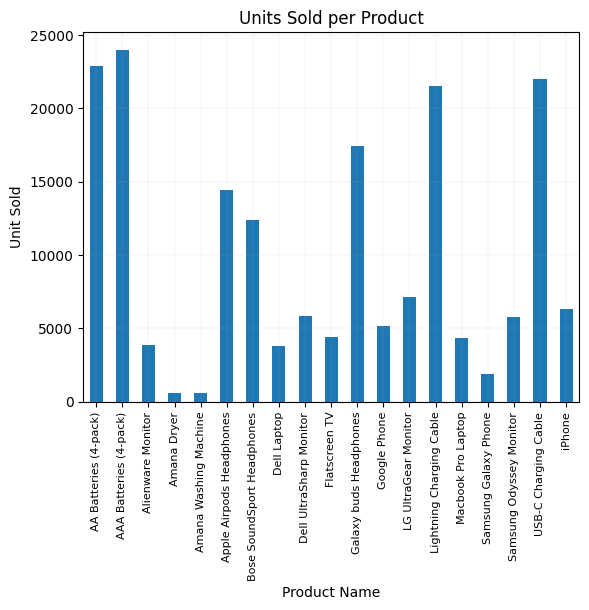

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()

product_df.plot(kind='bar', title="Units Sold per Product")

plt.xlabel('Product Name')
plt.ylabel('Unit Sold')
plt.xticks(rotation='vertical', size=8)
plt.grid(linewidth=0.1)

plt.show()

## Plotting Dual Axis Chart of Units Purchased and Unit Price by Product

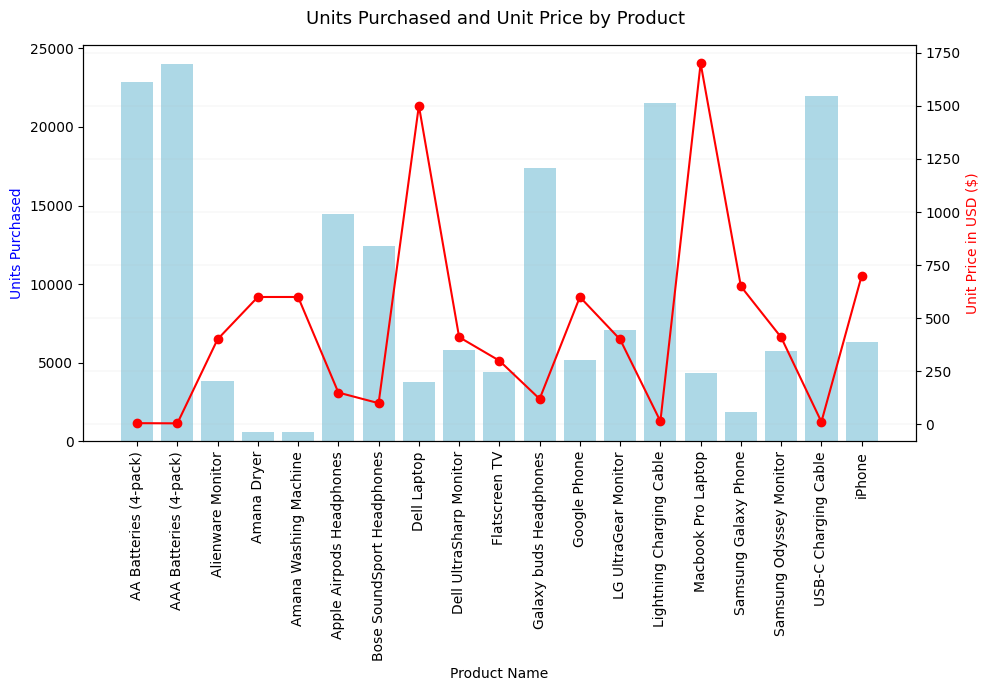

In [19]:
product_df = df.groupby('Product Name', observed=False)['Units Purchased'].sum()
price_df = df.groupby('Product Name', observed=False)['Unit Price'].mean()

# first axis and figure size
fig, ax1 = plt.subplots(figsize=(10, 7))

# Bar chart and first y-axis for Units Purchased
ax1.bar(product_df.index, product_df, color='lightblue', label='Units Purchased')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Units Purchased', color='b')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility

# Line chart and the second y-axis for Unit Price
ax2 = ax1.twinx()
ax2.plot(price_df.index, price_df, color='r', label='Unit Price', marker='o')
ax2.set_ylabel('Unit Price in USD ($)', color='r')

plt.grid(linewidth=0.1)
fig.suptitle('Units Purchased and Unit Price by Product', fontsize=13)

plt.tight_layout()

plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1. Retail Sales Analysis and Insights/4. Product Sales Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights

1. Top-Selling Product:
   AAA Batteries (4-pack) lead the pack with 23,993 units sold, closely followed by AA Batteries (4-pack) and USB-C Charging Cables.

2. Accessory Dominance:
  The top 5 products are all low-cost, high-demand accessories (batteries, cables, headphones) rather than high-ticket items like phones      or laptops.

3. Price vs. Volume Trend:
  Low-cost items significantly outperform premium electronics in volume sold. For example, AAA Batteries outsold the iPhone nearly 4 times and the MacBook Pro 5.5 times.

4. Brand Appeal in Audio:
 In the headphone category, Galaxy Buds outperform Apple Airpods and Bose SoundSport, suggesting strong market preference or price-value      advantage.

5. Low Sales in High-Value Appliances:
  Items like Amana Dryers and Washing Machines had the lowest sales, indicating either limited demand, higher price sensitivity, or fewer      purchase occasions.

## Strategic Recommendations

1. Double Down on Fast-Moving Accessories:
    Increase marketing and shelf space for top-performing accessories like batteries and charging cables. Consider bundling them with other products for upselling.

2. Leverage Volume Leaders for Cross-Selling:
    Use high-demand products (e.g., AAA/AA batteries) as entry points to recommend related items (e.g., remotes, toys, small electronics) during checkout.

3. Promote Mid-Tier Headphones More Aggressively:
    Galaxy Buds and Apple Airpods are clear leaders in the audio space. Offer discounts, bundles, or financing to push premium brands like Bose or increase sales further.

4. Review Pricing & Promotion of High-Ticket Items:
    Laptops, phones, and monitors show relatively lower sales. Reassess marketing efforts, financing options, or promotional campaigns to boost their visibility and affordability.

5. Investigate Appliance Sales Channels:
    The extremely low sales for dryers and washing machines may indicate channel mismatch (e.g., people buying these elsewhere), poor visibility, or low stock levels, worth further diagnostic analysis.

